Data availability:
    centrum : from 2019-02-07 continuous
    com: 2018-11-04 2019-04-30 and 219-10-21 continuous
    hu: continuous

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
db = pd.read_csv('VkerDB.csv')
db.shape

(2593, 11)

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 11 columns):
id             2593 non-null int64
date           2593 non-null object
price          2593 non-null float64
price_sqm      2593 non-null int64
room           2593 non-null float64
sqm            2593 non-null float64
region         1700 non-null object
description    1060 non-null object
agency         867 non-null object
source         2593 non-null object
url            2593 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 222.9+ KB


In [122]:
db['date'] = pd.to_datetime(db['date'])
db['date'].map(lambda x: x.date())
db.dtypes

id                      int64
date           datetime64[ns]
price                 float64
price_sqm               int64
room                  float64
sqm                   float64
region                 object
description            object
agency                 object
source                 object
url                    object
dtype: object

In [107]:
db.sort_values('date', inplace = True)
db.reset_index(drop = True, inplace = True)

#### number of ads by sources
only hu is complete

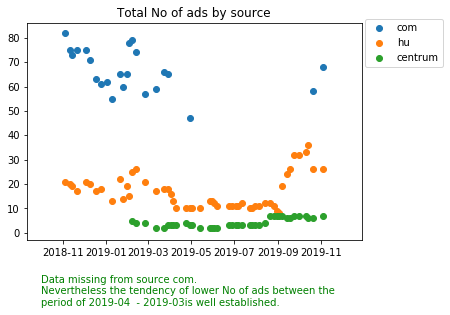

In [282]:
fig = plt.figure()

for i in db['source'].unique():
    v = db.loc[db['source'] == i].groupby('date')['id'].count()
    plt.scatter(v.index, v, label = i)
    
plt.title('Total No of ads by source')
plt.legend(loc = (1.01,0.8))
plt.text('2018-10', -30, 'Data missing from source com.\nNevertheless \
the tendency of lower No of ads between the\nperiod of 2019-04  - 2019-03\
is well established.', color = 'g')
plt.show()

#### number of newly published ads by source

In [246]:
# No of ads on their first appearience, monthly new ads
idcount = db.groupby('id').agg({'date': 'min'}).groupby('date').agg({'date':'count'})
idcount['new_ids'] =idcount['date']
idcount = idcount.drop('date', axis = 1)
idcount['total'] = db.groupby('date').agg({'date':'count'})
idcount['ratio%'] = round((idcount['new_ids'] * 100) / idcount['total'], 1)

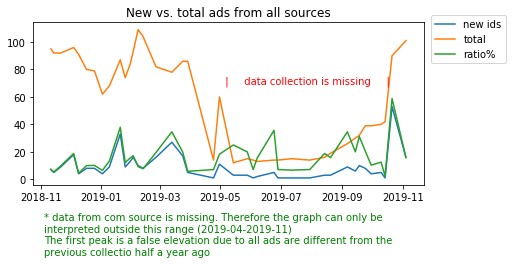

In [285]:
fig = plt.figure(figsize = (7,3))
plt.plot(idcount['new_ids'][1:], label = 'new ids')
plt.plot(idcount['total'][1:], label = 'total')    
plt.plot(idcount['ratio%'][1:], label = 'ratio%')
plt.legend(loc = (1.02,0.75))
plt.annotate('  |     data collection is missing     |', xy=(idcount.index[21], 70), color = 'r')
plt.text(idcount.index[0],-55, '* data from com source is missing. Therefore \
the graph can only be \ninterpreted outside this range (2019-04-2019-11) \n\
The first peak is a false elevation due to all ads are different from the \n\
previous collection half a year ago', color='g')
plt.title('New vs. total ads from all sources');

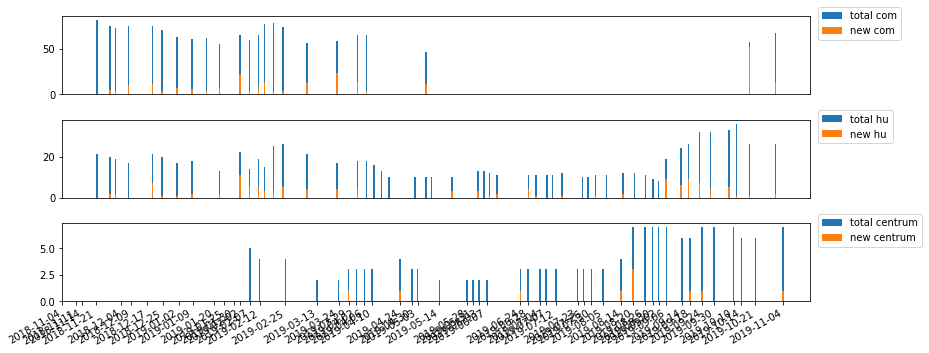

In [334]:
fig = plt.figure(figsize = (13,5))
a = 1 #subplot starter
#plt.title('No of new ads by source')
x = db.groupby('date')['date'].count().index
for i in db['source'].unique():
    ax = fig.add_subplot(3,1, a)
    v = db.loc[db['source'] == i].groupby('id').agg({'date': 'min'}).groupby('date').agg({'date':'count'})
    v['ids'] = v['date']
    vv = db.loc[db['source'] == i].groupby('date')['date'].count()
    ax.bar(vv.index, vv, label = 'total ' + i)
    ax.bar(v.index[1:], v['ids'][1:], label = 'new ' + i)
    
    plt.legend(loc = (1.01,0.7))
    ax.set_xticks([])
    
    a +=1
    
plt.xticks(x, rotation = 30, ha = 'right')
plt.tight_layout()
plt.show()

#### price change tendencies
all data included

In [132]:
itemcounts = db.groupby('date').agg({'id': 'count', 
                       'sqm': 'mean', 
                       'price': ['mean','median','min','max']})

'\nthe number of ads plummeted between April 2019 - September 2019\nSince September the numbere of ads hit up\n'

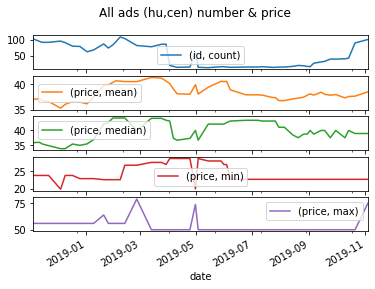

In [133]:
itemcounts[['id', 'price']].plot(subplots=True, sharex = True, \
                                 title = 'All ads (hu,cen) number & price')
;
'''
the number of ads plummeted between April 2019 - September 2019
Since September the numbere of ads hit up
'''

In [134]:
# get rid of outlayers
itemcounts['Q75'] = db.groupby('date')['price'].quantile(0.75)
itemcounts['Q25'] = db.groupby('date')['price'].quantile(0.25)
itemcounts['Q90'] = db.groupby('date')['price'].quantile(0.90)
itemcounts['Q10'] = db.groupby('date')['price'].quantile(0.10)

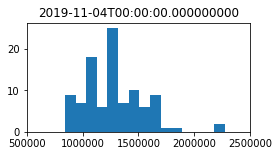

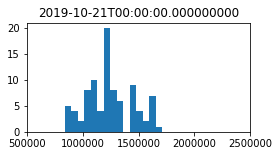

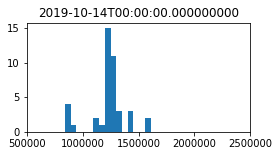

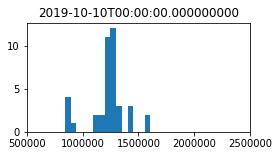

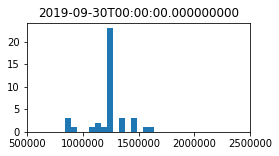

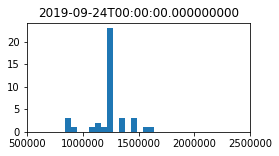

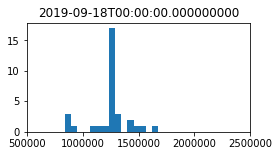

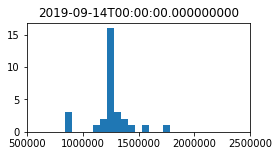

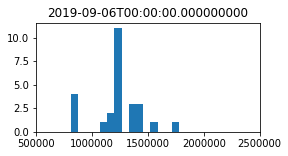

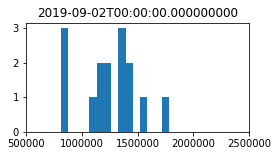

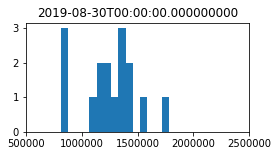

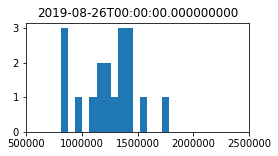

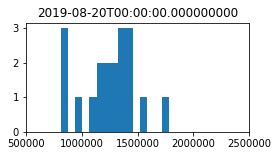

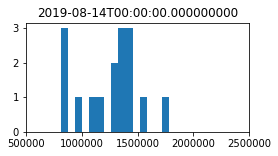

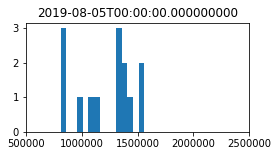

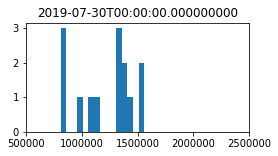

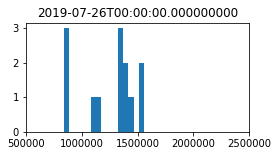

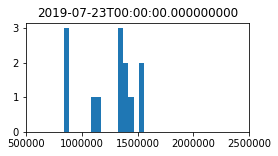

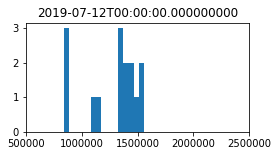

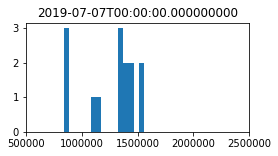

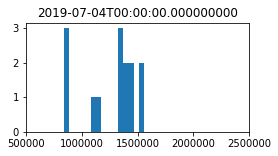

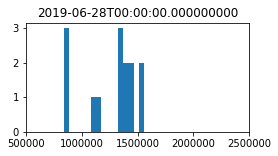

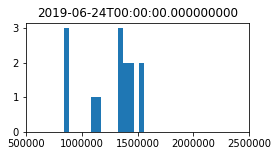

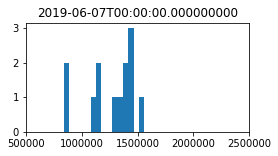

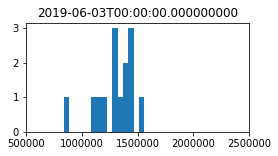

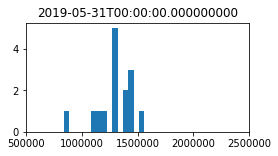

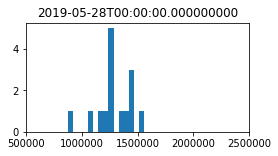

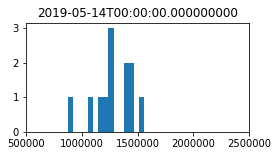

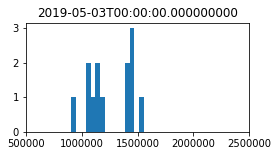

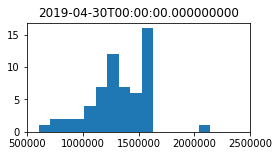

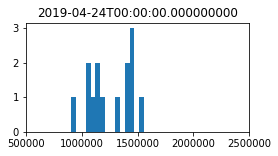

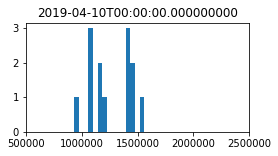

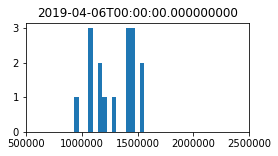

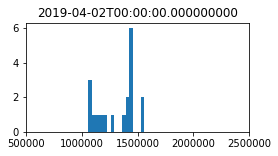

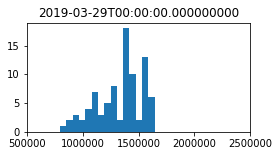

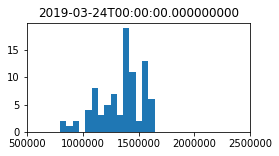

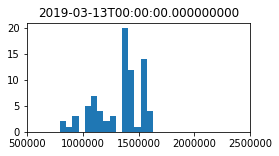

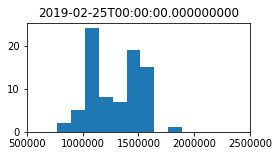

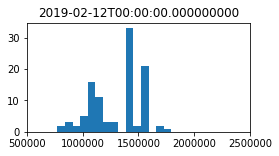

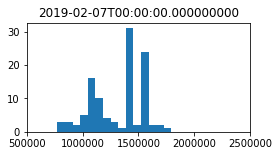

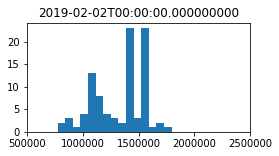

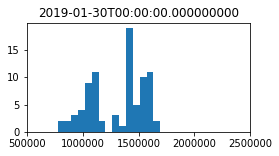

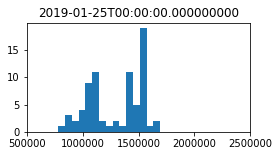

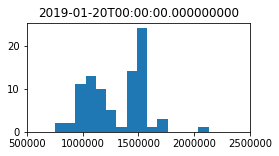

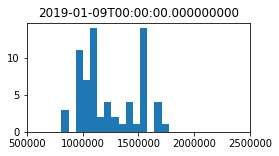

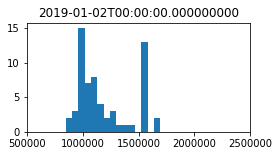

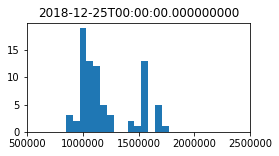

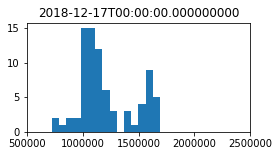

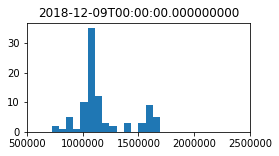

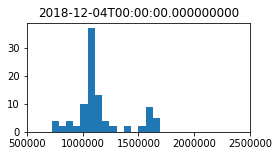

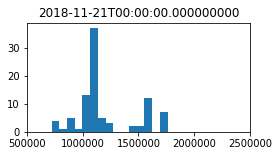

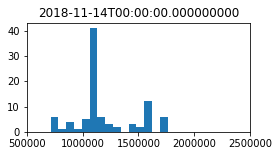

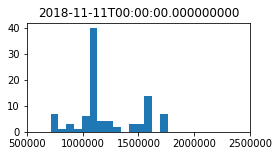

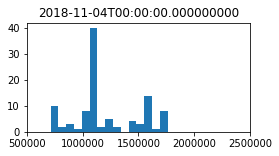

In [135]:
# see price per sqm distribution by dates
for i in sorted(db['date'].unique(), reverse = True):    
    v = db[db['date'] == i].groupby('id')['price_sqm'].mean()
    fig = plt.figure(figsize=(4,2))    
    plt.hist(v, bins = 15)
    plt.xlim(500000,2500000)
    plt.title(i)
    plt.show()

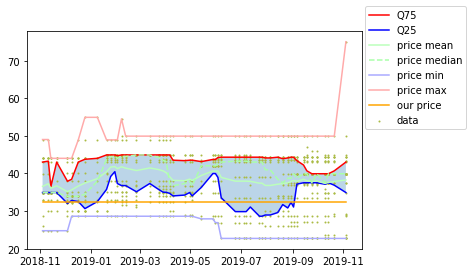

In [64]:
fig = plt.figure(figsize=(6,4))
plt.plot(itemcounts[['Q75']],c='r', label ='Q75')
plt.plot(itemcounts[['Q25']], c ='b', label = 'Q25')
plt.plot(itemcounts[('price','mean')],c='#bbffbb', label = 'price mean')
plt.plot(itemcounts[('price', 'median')],c='#aaffaa',  linestyle='--', label = 'price median')
plt.plot(itemcounts[('price','min')], c= '#aaaaff', label = 'price min')
plt.plot(itemcounts[('price','max')], c='#ffaaaa', label = 'price max')
plt.fill_between(itemcounts.index,itemcounts['Q25'],itemcounts['Q75'], alpha = 0.3)
plt.plot(itemcounts.index, np.repeat(32.5, len(itemcounts)),c='orange', label='our price')
plt.scatter(db.loc[(db['source'] != 'com'),'date'], db.loc[db['source'] != 'com','price'],s = 1, c='#aabb44', label= 'data' )
plt.legend(loc = (1.01,0.55))
plt.show()

In [18]:
# ads lifetime: com excluded, 156 individual ads over a year
db1= db.loc[(db['source'] != 'com')].groupby('id').agg({'date': ['count', 'min','max'], 'price': 'mean', 'price_sqm': 'mean'}).sort_values([('date','max'),('date','count')])
#exclude the one still active: 124
maxdates = db1[('date','max')].unique()
inact = db1.loc[db1[('date','max')] != maxdates[-1]]
act = db1.loc[db1[('date','max')] == maxdates[-1]]

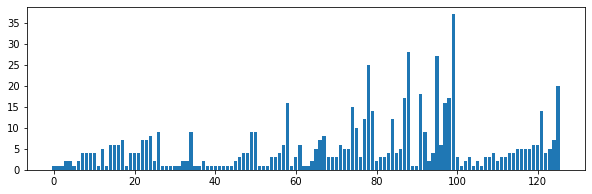

In [19]:
fig = plt.figure(figsize=(10,3))
plt.bar(range(len(inact.index)), inact[('date','count')].values)
plt.show()
#inact[['price', 'price_sqm',]].hist(figsize=(10,2),sharex =True, bins=15)
#act[['price', 'price_sqm',]].hist(figsize=(10,3), sharex = True, bins=15);
# previous one year vs latest 

In [20]:
unique = db.groupby('id').agg({'id': 'count','price': 'mean', 'price_sqm': 'mean', 'sqm': 'mean','date': 'min'})

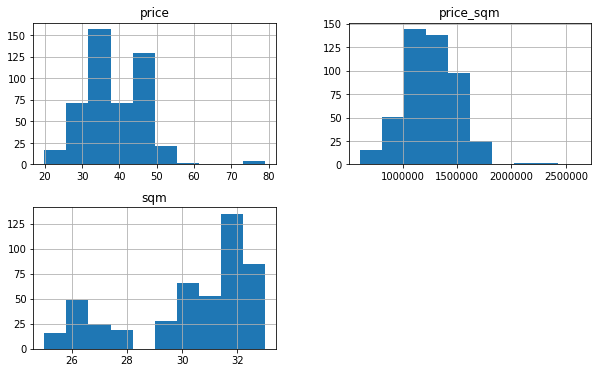

In [21]:
#db[['price', 'price_sqm', 'sqm']].hist(figsize=(10,6))
unique[['price', 'price_sqm', 'sqm']].hist(figsize=(10,6));

/home/trismegistos/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/trismegistos/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/trismegistos/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


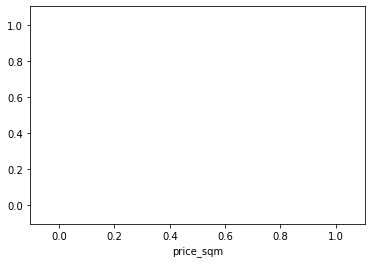

In [22]:
import seaborn as sns
g = unique.loc[unique['date'] == '2019-10-11']
sns.distplot(g['price_sqm'])

In [23]:
set(unique['date'].values.tolist())

{1541289600000000000,
 1541894400000000000,
 1542153600000000000,
 1542758400000000000,
 1543881600000000000,
 1544313600000000000,
 1545004800000000000,
 1545696000000000000,
 1546387200000000000,
 1546992000000000000,
 1547942400000000000,
 1548374400000000000,
 1548806400000000000,
 1549065600000000000,
 1549497600000000000,
 1549929600000000000,
 1551052800000000000,
 1552435200000000000,
 1553385600000000000,
 1553817600000000000,
 1556064000000000000,
 1556582400000000000,
 1557792000000000000,
 1559001600000000000,
 1559520000000000000,
 1559865600000000000,
 1561334400000000000,
 1561680000000000000,
 1562889600000000000,
 1564444800000000000,
 1565740800000000000,
 1566259200000000000,
 1567728000000000000,
 1568419200000000000,
 1568764800000000000,
 1569283200000000000,
 1569801600000000000,
 1570665600000000000,
 1571011200000000000,
 1571616000000000000,
 1572825600000000000}

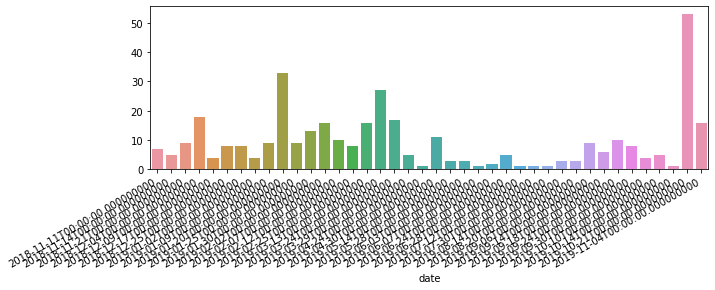

In [24]:
fig = plt.figure(figsize=(10,3))
news = unique.groupby('date')['price'].count()[1:]
sns.barplot(news.index,news.values)
plt.xticks(rotation=30, ha = 'right' )
plt.show()